In [1]:
import pandas as pd
import numpy as np

In [92]:
df=pd.read_csv("titanic-passengerscheck.csv" ,sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
# supprimer valeur null + 60%
def drop_nan_columns(data, ratio=1.0)->pd.DataFrame:
    """
    The ratio parameter (0.0<=ratio<1.0) lets you drop columns which has 'ratio'% of nans. (i.e if ratio is 0.8 then all columns with 80% or more entries being nan get dropped)
    Returns a new dataframe
    """
    col_list = []
    na_df = data.isna()
    total_size = na_df.shape[0]
    for col in na_df:
        a = na_df[col].value_counts()
        if False not in a.keys():
            col_list.append(col)
        elif True not in a.keys():
            pass
        else:
            if a[True]/total_size >= ratio:
                col_list.append(col)
    print(f"{len(col_list)} columns dropped- {col_list}")
    return data.drop(col_list, axis=1)
#supprimer les columns qui ont 60% des valeurs nulls
df =drop_nan_columns(df, ratio=0.6)


1 columns dropped- ['Cabin']


In [94]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [95]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [96]:
df["Embarked"].fillna(method="ffill",inplace=True)
#df["Embarked"].fillna(method="backfill",inplace=True)

In [97]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

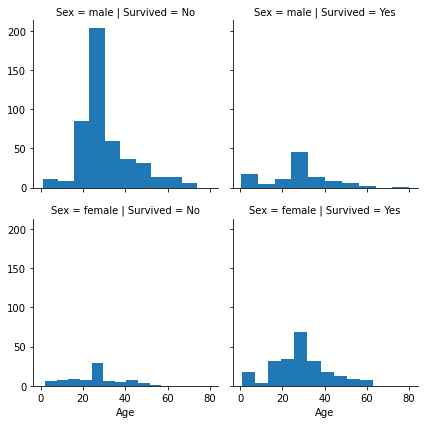

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.FacetGrid(df,row="Sex",col="Survived")
g.map(plt.hist,"Age",bins=10)

In [25]:
from plotnine import ggplot

  ggplot() 
  geom_bar(aes(x = Sex, fill = Survived)) 
  geom_text(data = gender, 
            aes(x = Sex, y = Count, label = Count), 
            position = position_dodge(width=0.9), 
            vjust=-0.25, 
            fontface = "bold") +
  geom_label(data = gender_ratio, 
             aes(x = Sex, y = Count, label = paste0(Percentage, "%"), group = Survived), 
             position = position_stack(vjust = 0.5)) +
  theme_few() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Gender Survival Rate") +
  scale_x_discrete(name= "Gender") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))


IndentationError: unexpected indent (<ipython-input-25-31ca9d10dd07>, line 3)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


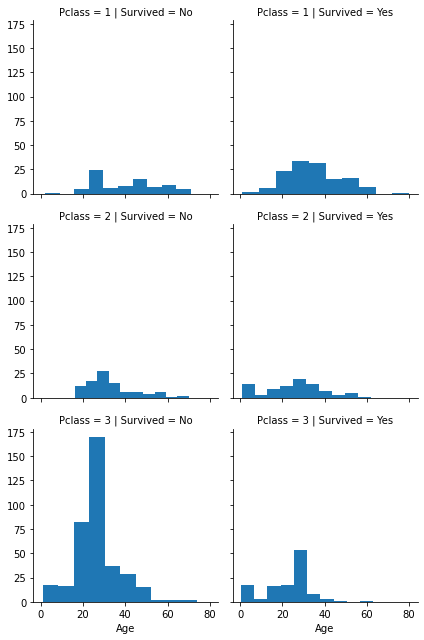

In [26]:
g=sns.FacetGrid(df,row="Pclass",col="Survived")
g.map(plt.hist,"Age",bins=10)

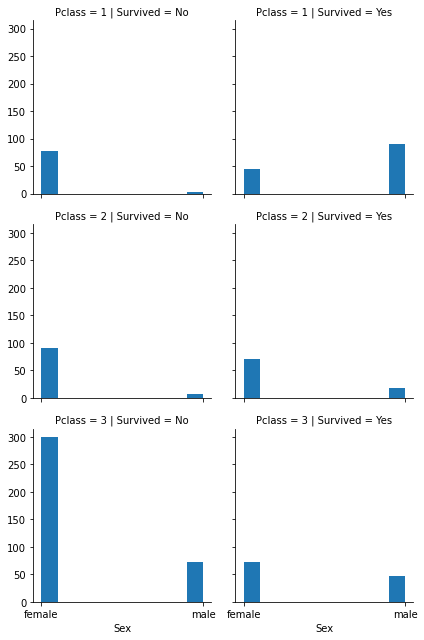

In [27]:
g=sns.FacetGrid(df,row="Pclass",col="Survived")
g.map(plt.hist,"Sex",bins=10)

C:\Users\cherif\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cherif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


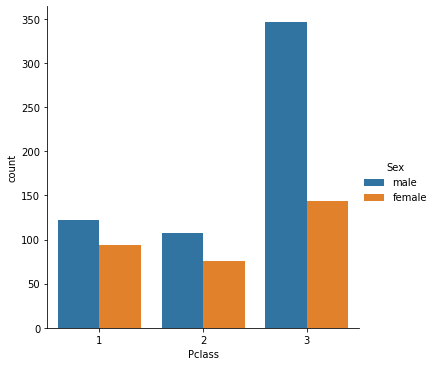

In [28]:
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

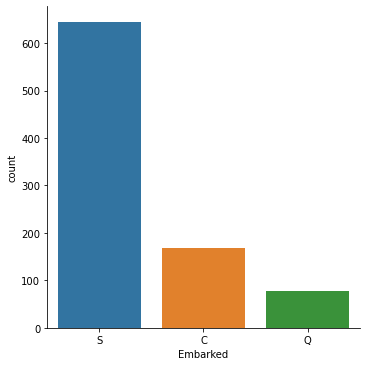

In [31]:
sns.factorplot('Embarked',data=df,kind='count')

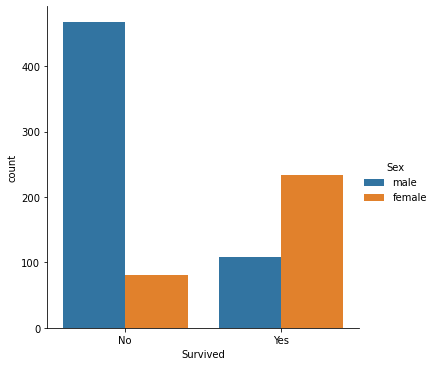

In [33]:
sns.factorplot('Survived',data=df,hue='Sex',kind='count')

C:\Users\cherif\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cherif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


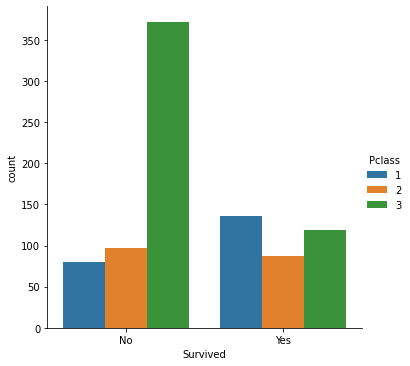

In [34]:
sns.factorplot('Survived',data=df,hue='Pclass',kind='count')

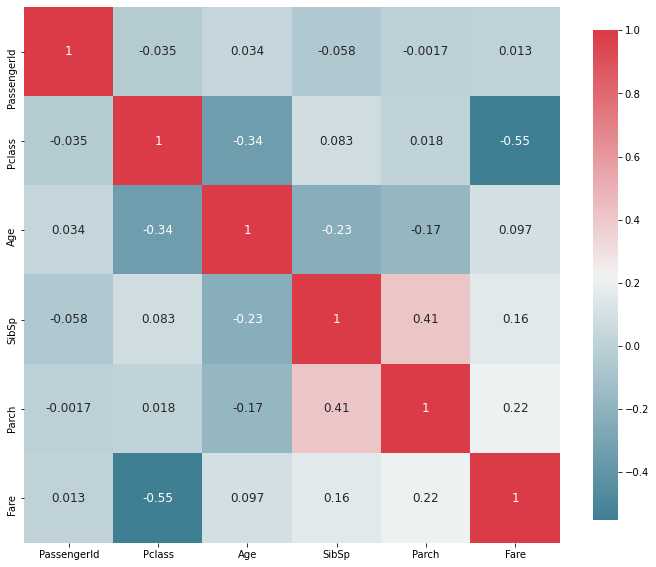

In [53]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

plot_correlation_map(df)

In [98]:
survived_num={"Survived":{"Yes":0,"No":1}}
df.replace(survived_num, inplace=True)

df[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean(5)

,Survived
Pclass,
1,0.370370
2,0.527174
3,0.757637


In [40]:
'''This function create a correlation matrix heatmap that shows the correlation between all the columns of our data.
To make it more clear and visible, it uses numbers and colors, Blue for negative and red for positivie in the range of [-1.0,1.0]. 
The stronger the color, the larger the correlation magnitude.'''


'This function create a correlation matrix heatmap that shows the correlation between all the columns of our data.\nTo make it more clear and visible, it uses numbers and colors, Blue for negative and red for positivie in the range of [-1.0,1.0]. \nThe stronger the color, the larger the correlation magnitude.'

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [43]:
df.drop("PassengerId",axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,2,male,28.0,0,0,248740,13.0000,S
1,1,3,male,25.0,0,0,348123,7.6500,S
2,1,3,male,20.0,0,0,350050,7.8542,S
3,1,3,female,29.0,0,4,349909,21.0750,S
4,1,1,male,31.0,1,0,F.C. 12750,52.0000,S


In [44]:
sex_num={"Sex":{"male":0,"female":1}}
df.replace(sex_num, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,2,0,28.0,0,0,248740,13.0000,S
1,1,3,0,25.0,0,0,348123,7.6500,S
2,1,3,0,20.0,0,0,350050,7.8542,S
3,1,3,1,29.0,0,4,349909,21.0750,S
4,1,1,0,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,14.0,1,0,237736,30.0708,C
887,1,3,0,22.0,0,0,2669,7.2292,C
888,1,3,1,30.0,0,0,315084,8.6625,S
889,1,3,0,28.0,0,0,349215,7.8958,S


In [99]:
x=df["Name"].str.split(",",n=3,expand=True)
x

,0,1
0,Collander,Mr. Erik Gustaf
1,Moen,Mr. Sigurd Hansen
2,Jensen,Mr. Hans Peder
3,Palsson,Mrs. Nils (Alma Cornelia Berglund)
4,Davidson,Mr. Thornton
...,...,...
886,Nasser,Mrs. Nicholas (Adele Achem)
887,Sirayanian,Mr. Orsen
888,Cacic,Miss. Marija
889,Petroff,"Mr. Pastcho (""Pentcho"")"


In [100]:
y=x[1].str.split(".",expand=True)
y

,0,1,2
0,Mr,Erik Gustaf,None
1,Mr,Sigurd Hansen,None
2,Mr,Hans Peder,None
3,Mrs,Nils (Alma Cornelia Berglund),None
4,Mr,Thornton,None
...,...,...,...
886,Mrs,Nicholas (Adele Achem),None
887,Mr,Orsen,None
888,Miss,Marija,None
889,Mr,"Pastcho (""Pentcho"")",None


In [101]:
y.drop(y.columns[[1,2]],axis=1,inplace=True)
y

,0
0,Mr
1,Mr
2,Mr
3,Mrs
4,Mr
...,...
886,Mrs
887,Mr
888,Miss
889,Mr


In [118]:
df=pd.concat([df,y],axis=1)


In [119]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,0
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
887,61,1,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C,Mr
888,535,1,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S,Miss
889,102,1,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S,Mr


In [120]:
df.rename(columns={0:"Title"},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
887,61,1,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C,Mr
888,535,1,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S,Miss
889,102,1,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S,Mr


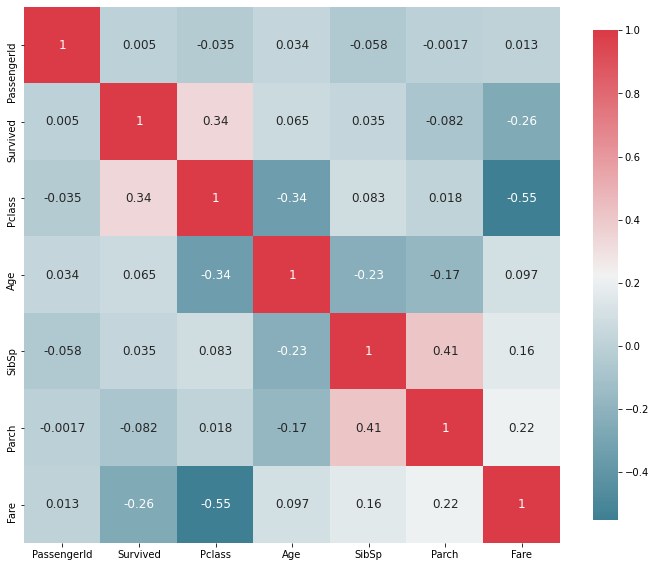

In [67]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

plot_correlation_map(df)

In [68]:
df[["Title","Age"]].groupby(["Title"], as_index=True).mean(5)

,Age
Title,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,40.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,6.916750
Miss,23.005495


C:\Users\cherif\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cherif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


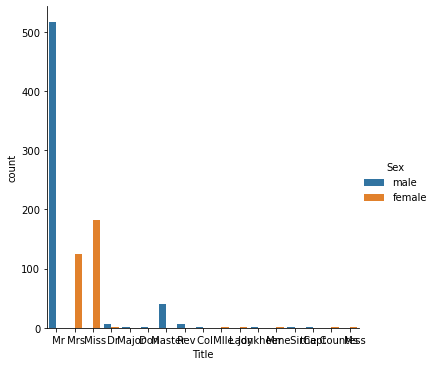

In [70]:
sns.factorplot('Title',data=df,hue='Sex',kind='count')

In [105]:
df["Title"].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 Lady              1
 Sir               1
 Ms                1
 Jonkheer          1
 Capt              1
 the Countess      1
 Don               1
Name: Title, dtype: int64

In [88]:
dft['Title'] = df['Title'].replace({"Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer", "Rev":"Officer", "Jonkheer":"Royalty", "Don":"Royalty", "Sir" :"Royalty", "Lady" :"Royalty", "the Countess":"Royalty", "Dona":"Royalty", "Mme":"Miss", "Mlle":"Miss", "Miss" : "Miss", "Ms":"Mrs", "Mr" :"Mrs", "Mrs" : "Mrs" , "Master" : "Master"})

TypeError: 'NoneType' object is not subscriptable

In [90]:
df["Title"].value_counts()

TypeError: 'NoneType' object is not subscriptable

In [91]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [106]:
Title_Dictionary = {"Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer", "Rev":"Officer", "Jonkheer":"Royalty", "Don":"Royalty", "Sir" :"Royalty", "Lady" :"Royalty", "the Countess":"Royalty", "Dona":"Royalty", "Mme":"Miss", "Mlle":"Miss", "Miss" : "Miss", "Ms":"Mrs", "Mr" :"Mrs", "Mrs" : "Mrs" , "Master" : "Master" }  
df1=df.replace("Title":Title_Dictionary)


SyntaxError: invalid syntax (<ipython-input-106-176ea0df78ce>, line 2)

In [107]:
df["Title"].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 Lady              1
 Sir               1
 Ms                1
 Jonkheer          1
 Capt              1
 the Countess      1
 Don               1
Name: Title, dtype: int64

In [121]:
df['Title'] = df['Title'].replace("Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer", "Rev":"Officer", "Jonkheer":"Royalty", "Don":"Royalty", "Sir" :"Royalty", "Lady" :"Royalty", "the Countess":"Royalty", "Dona":"Royalty", "Mme":"Miss", "Mlle":"Miss", "Miss" : "Miss", "Ms":"Mrs", "Mr" :"Mrs", "Mrs" : "Mrs" , "Master" : "Master",inplace=True)
df["Title"].value_counts()

SyntaxError: invalid syntax (<ipython-input-121-0fae8ba76cb7>, line 1)

In [114]:
df["Title"].value_counts()

Series([], Name: Title, dtype: int64)

In [117]:
df.drop("Title",axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [122]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
df['Name'] = df['Name'].replace(['Officer'],'Collander, Mr. Erik Gustaf')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr


In [129]:
df["Title"].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 Lady              1
 Sir               1
 Ms                1
 Jonkheer          1
 Capt              1
 the Countess      1
 Don               1
Name: Title, dtype: int64

In [131]:
df["Title"].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 Lady              1
 Sir               1
 Ms                1
 Jonkheer          1
 Capt              1
 the Countess      1
 Don               1
Name: Title, dtype: int64

In [134]:
df.drop("Title",axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [136]:
for dataset in df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+).', expand=False)
df.head()

AttributeError: 'str' object has no attribute 'Name'

In [137]:
y

,0
0,Mr
1,Mr
2,Mr
3,Mrs
4,Mr
...,...
886,Mrs
887,Mr
888,Miss
889,Mr


In [138]:
df1=pd.concat([df, y], axis=1)
df1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,0
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr


In [139]:
df1.rename(columns={0:"Title"},inplace=True)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
887,61,1,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C,Mr
888,535,1,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S,Miss
889,102,1,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S,Mr


In [145]:
df1['Title'] = df1['Title'].replace(['Mr'],'XXXXXX')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr


In [147]:
df1["FamilySize"]=df1["SibSp"]+df1["Parch"]
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,family,FamilySize
0,343,1,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr,0,0
1,76,1,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr,0,0
2,641,1,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr,0,0
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs,4,4
4,672,1,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr,1,1


In [148]:
df1.drop("family",axis=1,inplace=True)
df1.

KeyError: "['family'] not found in axis"